In [13]:
import pandas as pd
import numpy as np

from orbit.diagnostics.plot import plot_predicted_data, plot_predicted_components

In [1]:
from orbit.models.ets import ETSModel

In [2]:
from orbit.models.forecaster import MAPForecaster

In [3]:
from orbit.estimators.stan_estimator import StanEstimatorMAP

In [4]:
from orbit.utils.dataset import load_iclaims

In [5]:
%load_ext autoreload
%autoreload 2

In [23]:
ets = ETSModel(seasonality=52)

In [24]:
ets_forecaster = MAPForecaster(model=ets, response_col='claims', date_col='week', estimator_type=StanEstimatorMAP)

In [25]:
df = load_iclaims()
df.dtypes

week              datetime64[ns]
claims                   float64
trend.unemploy           float64
trend.filling            float64
trend.job                float64
sp500                    float64
vix                      float64
dtype: object

In [26]:
test_size=52
train_df=df[:-test_size]
test_df=df[-test_size:]

In [27]:
ets_forecaster.fit(train_df)

In [28]:
predicted_df = ets_forecaster.predict(raw_df)

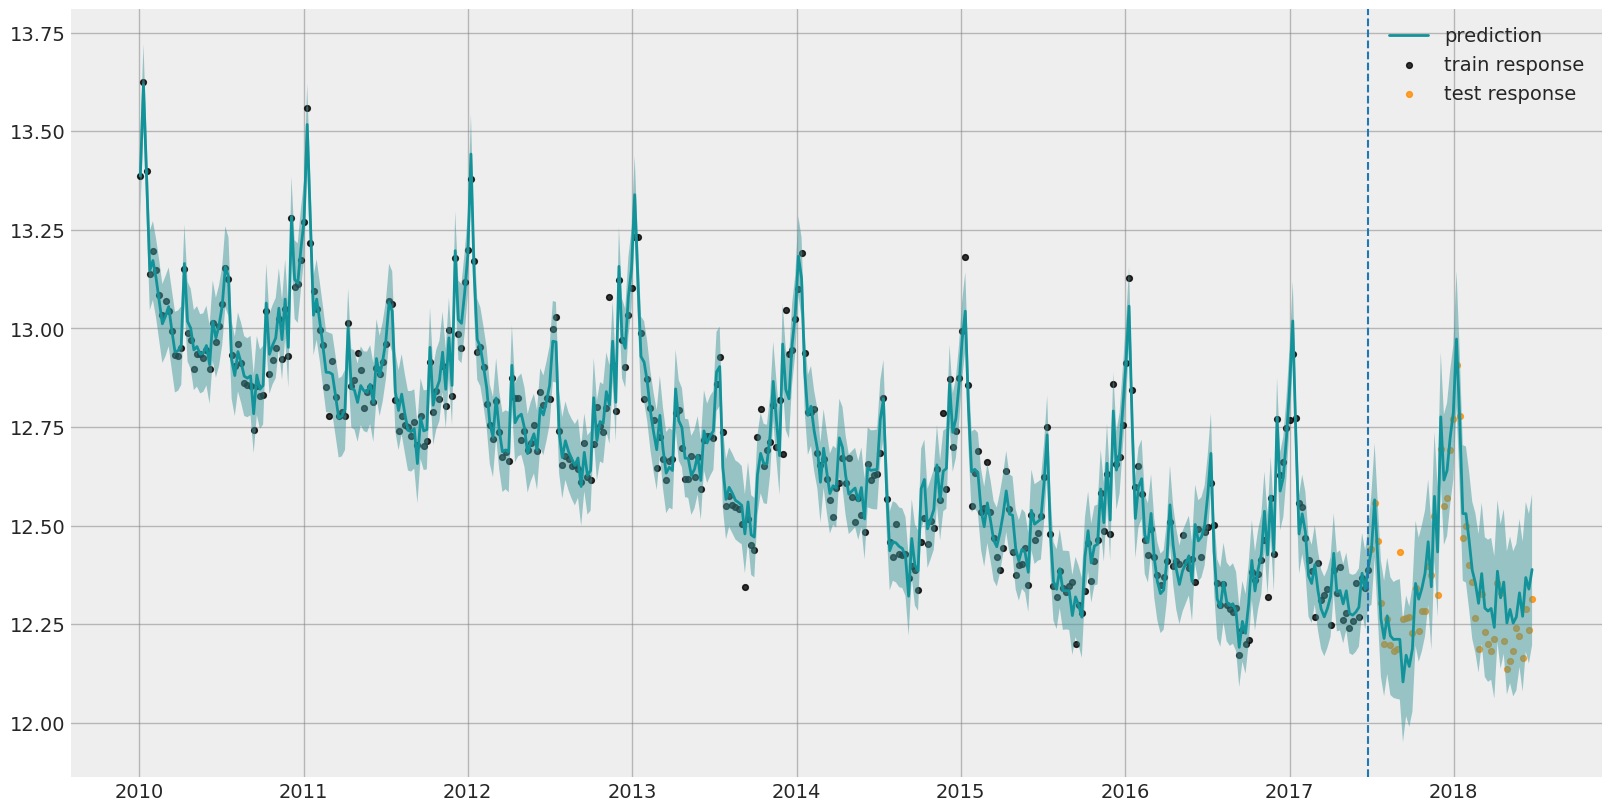

In [29]:
_ = plot_predicted_data(training_actual_df=train_df,
                        predicted_df=predicted_df,
                        date_col='week',
                        actual_col='claims',
                        test_actual_df=test_df)